# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: income.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('income.csv')
print(data.shape)
data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Exploration

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


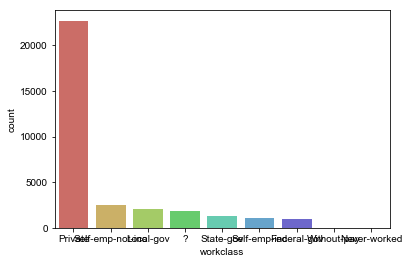

In [4]:
print(data['workclass'].value_counts())

sns.countplot(x='workclass',data = data, palette='hls',order = data['workclass'].value_counts().index)
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


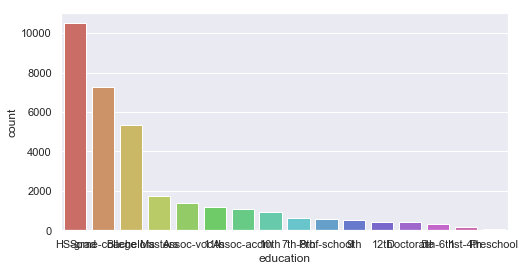

In [5]:
print(data['education'].value_counts())

sns.countplot(x='education',data = data, palette='hls',order = data['education'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


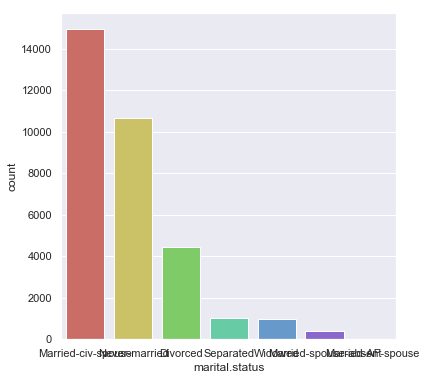

In [6]:
print(data['marital.status'].value_counts())

sns.countplot(x='marital.status',data = data, palette='hls',order = data['marital.status'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


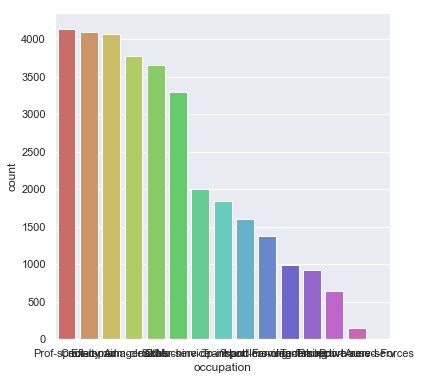

In [7]:
print(data['occupation'].value_counts())

sns.countplot(x='occupation',data = data, palette='hls',order = data['occupation'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64


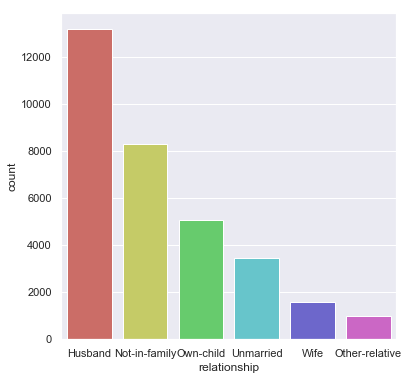

In [8]:
print(data['relationship'].value_counts())

sns.countplot(x='relationship',data = data, palette='hls',order = data['relationship'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64


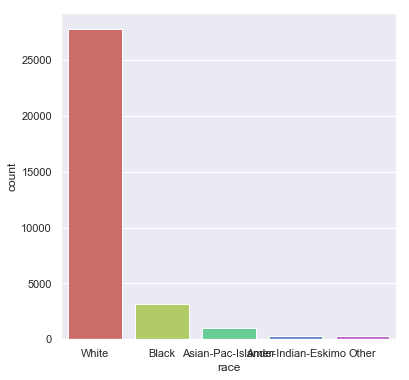

In [9]:
print(data['race'].value_counts())

sns.countplot(x='race',data = data, palette='hls',order = data['race'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

Male      21790
Female    10771
Name: sex, dtype: int64


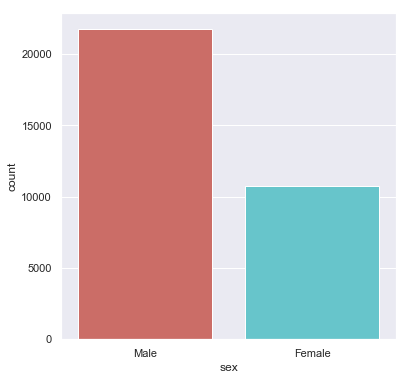

In [10]:
print(data['sex'].value_counts())

sns.countplot(x='sex',data = data, palette='hls',order = data['sex'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

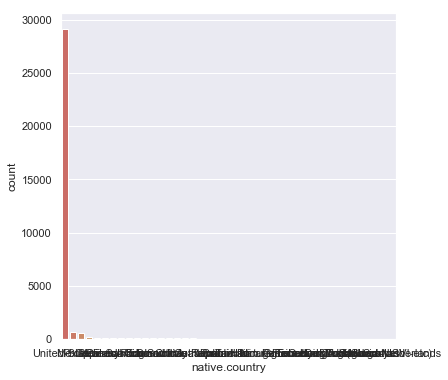

In [11]:
print(data['native.country'].value_counts())

sns.countplot(x='native.country',data = data, palette='hls',order = data['native.country'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

<=50K    24720
>50K      7841
Name: income, dtype: int64


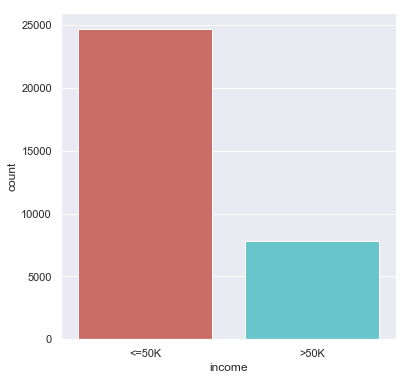

In [12]:
print(data['income'].value_counts())

sns.countplot(x='income',data = data, palette='hls',order = data['income'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

## Convert to Categorical to Numerical

In [13]:
data["workclass"]  = data["workclass"].astype('category')
data["workclass#"] = data["workclass"].cat.codes

data["education"]  = data["education"].astype('category')
data["education#"] = data["education"].cat.codes

data["marital.status"]  = data["marital.status"].astype('category')
data["marital.status#"] = data["marital.status"].cat.codes

data["occupation"]  = data["occupation"].astype('category')
data["occupation#"] = data["occupation"].cat.codes

data["relationship"]  = data["relationship"].astype('category')
data["relationship#"] = data["relationship"].cat.codes

data["race"]  = data["race"].astype('category')
data["race#"] = data["race"].cat.codes

data["sex"]  = data["sex"].astype('category')
data["sex#"] = data["sex"].cat.codes

data["income"]  = data["income"].astype('category')
data["income#"] = data["income"].cat.codes

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,native.country,income,workclass#,education#,marital.status#,occupation#,relationship#,race#,sex#,income#
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,...,United-States,<=50K,0,11,6,0,1,4,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,United-States,<=50K,4,11,6,4,1,4,0,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,...,United-States,<=50K,0,15,6,0,4,2,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,United-States,<=50K,4,5,0,7,4,4,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,United-States,<=50K,4,15,5,10,3,4,0,0


## Split Data to US Data only

In [14]:
USdata = data[data['native.country']=='United-States']
print(USdata.shape)
USdata.head()

(29170, 23)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,native.country,income,workclass#,education#,marital.status#,occupation#,relationship#,race#,sex#,income#
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,...,United-States,<=50K,0,11,6,0,1,4,0,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,United-States,<=50K,4,11,6,4,1,4,0,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,...,United-States,<=50K,0,15,6,0,4,2,0,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,United-States,<=50K,4,5,0,7,4,4,0,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,United-States,<=50K,4,15,5,10,3,4,0,0


<=50K    21999
>50K      7171
Name: income, dtype: int64


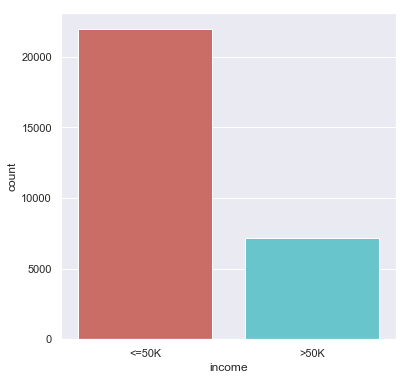

In [15]:
print(USdata['income'].value_counts())

sns.countplot(x='income',data = USdata, palette='hls',order = USdata['income'].value_counts().index)
sns.set(rc={'figure.figsize':(6,6)})
plt.show()

## Correlation

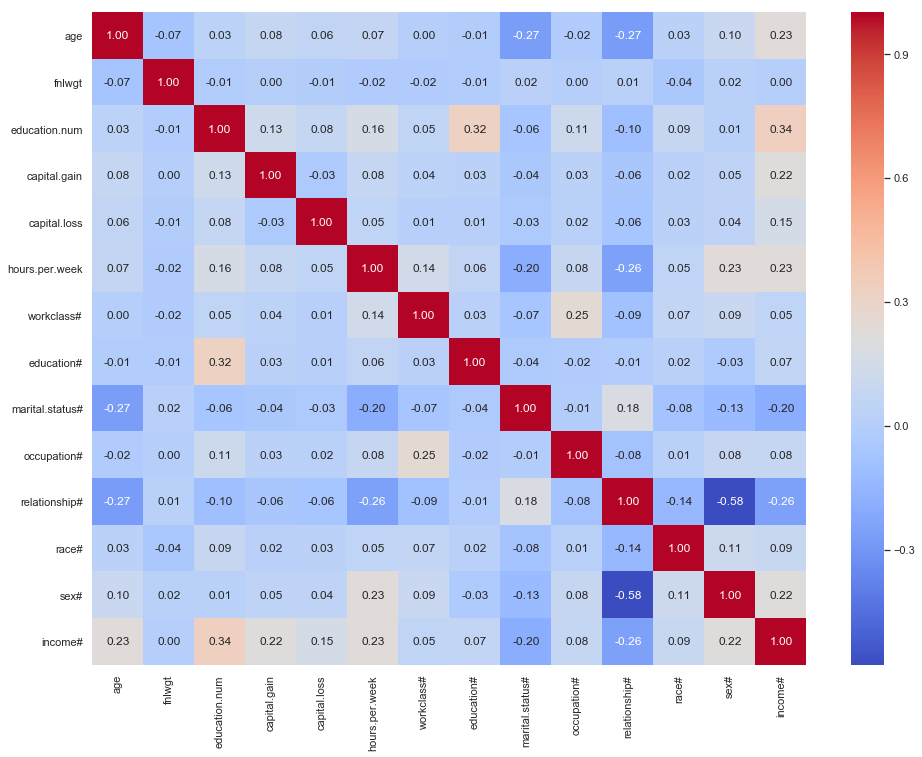

In [16]:
plt.figure(figsize=(16,12))
sns.heatmap(data=USdata.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [17]:
corr_rank = USdata.corr()
corr_rank["income#"].sort_values(ascending=False)

income#            1.000000
education.num      0.335994
age                0.234725
hours.per.week     0.232551
capital.gain       0.222601
sex#               0.221179
capital.loss       0.149118
race#              0.091689
occupation#        0.076080
education#         0.068172
workclass#         0.051627
fnlwgt             0.001987
marital.status#   -0.195785
relationship#     -0.255778
Name: income#, dtype: float64

## Data Processing and Selection

In [18]:
X = USdata[['education.num','age','hours.per.week','capital.gain','sex#','capital.loss',
          'education#','occupation#','race#','workclass#','fnlwgt','marital.status#','relationship#']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (29170, 13)


array([[     9,     90,     40,      0,      0,   4356,     11,      0,
             4,      0,  77053,      6,      1],
       [     9,     82,     18,      0,      0,   4356,     11,      4,
             4,      4, 132870,      6,      1]], dtype=int64)

In [19]:
y = USdata["income#"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (29170,)


0    0
1    0
2    0
3    0
4    0
Name: income#, dtype: int8

## Data Normalization

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (29170, 13)


D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.48830542,  3.74170522, -0.03605983, -0.1475567 , -1.41873439,
        10.51948478,  0.1519821 , -1.53926386,  0.35572962, -2.62707407,
        -1.04900862,  2.24193072, -0.27314666],
       [-0.48830542,  3.15870718, -1.80782569, -0.1475567 , -1.41873439,
        10.51948478,  0.1519821 , -0.60244492,  0.35572962,  0.09118323,
        -0.51679055,  2.24193072, -0.27314666]])

## Split Train Test

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (20419, 13) (20419,)
X TEST Set :  (8751, 13) (8751,)


## Gradient Boosting Classifier

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

R-Square               : 0.259
Mean Absolute Error    : 0.1386
Mean Squared Error     : 0.1386
Root Mean Squared Error: 0.3723
Accuracy               : 0.8614
Precision              : 0.7724
Recall                 : 0.6289


## Data Prediction

In [23]:
df_pred1 = USdata[USdata.index == 10]
df_pred2 = USdata[USdata.index == 1500]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,native.country,income,workclass#,education#,marital.status#,occupation#,relationship#,race#,sex#,income#
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,...,United-States,>50K,4,10,0,10,4,2,0,1
1500,49,Local-gov,159641,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,...,United-States,<=50K,2,9,0,4,4,4,0,0


In [24]:
Xp = df_pred[['education.num','age','hours.per.week','capital.gain','sex#','capital.loss',
          'education#','occupation#','race#','workclass#','fnlwgt','marital.status#','relationship#']].values
yp = df_pred["income#"]
Xp = scaler.transform(Xp)

pred = gb.predict(Xp)
pred

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([1, 0], dtype=int8)